In [8]:
import scipy.io as scio 
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage.color import rgb2grey
from sklearn.feature_extraction import image
import skimage.measure
from sklearn.cluster import spectral_clustering

In [2]:
pavia = {'rgb': scio.loadmat('PaviaRGB.mat')['PaviaRGB'],
         'color_map' : scio.loadmat('PaviaColorMap.mat')['PaviaColorMap'],
         'ground_truth' : scio.loadmat('PaviaGrTruth.mat')['PaviaGrTruth'],
         'ground_truth_mask' : scio.loadmat('PaviaGrTruthMask.mat')['PaviaGrTruthMask'],
         'wavelengths' : scio.loadmat('PaviaWavelengths.mat')['PaviaWavelengths'],
        }
sanbar = {'rgb': scio.loadmat('SanBarRGB.mat')['SanBarRGB'],
          'wavelengths': scio.loadmat('SanBarWavelengths.mat')['WaveLengths'],
          'hyperimage': scio.loadmat('SanBarHyperIm.mat')['SanBarIm88x400'],
         }

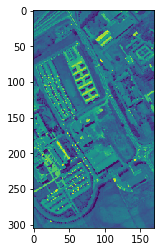

In [9]:
Img = pavia['rgb']
Img = ski.color.rgb2grey(Img)
downsample = ski.measure.block_reduce(Img, (2,2), np.max)

In [10]:
graph = image.img_to_graph(downsample)
graph.data = np.exp(-graph.data / graph.data.std())

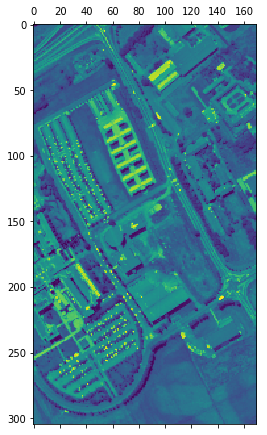

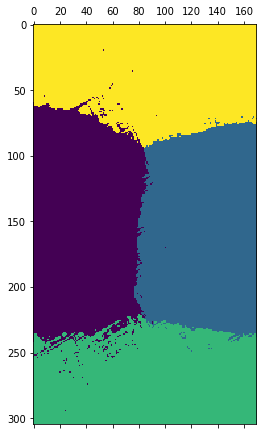

In [14]:
mask = downsample.astype(bool)
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(downsample)
plt.matshow(label_im)